In [1]:
import tensorflow as tf
from tensorflow import keras

import os
import tempfile

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [3]:
!pip install kaggle

In [4]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hhhhhhhhhhhhhj","key":"13c0a26e0ce02ae9cb00e651f6952912"}'}

In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# change the permission
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
import itertools
from sklearn.metrics import confusion_matrix



# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
              size=text_size)

In [7]:
!kaggle competitions download -c tabular-playground-series-jun-2021

  0% 0.00/3.14M [00:00<?, ?B/s]
100% 3.14M/3.14M [00:00<00:00, 98.5MB/s]
 77% 5.00M/6.49M [00:00<00:00, 22.6MB/s]
100% 6.49M/6.49M [00:00<00:00, 25.8MB/s]
  0% 0.00/264k [00:00<?, ?B/s]
100% 264k/264k [00:00<00:00, 82.6MB/s]


In [8]:
!ls

kaggle.json  sample_submission.csv.zip	train.csv.zip
sample_data  test.csv.zip


In [9]:
!unzip test.csv.zip

Archive:  test.csv.zip
  inflating: test.csv                


In [10]:
!unzip train.csv.zip

Archive:  train.csv.zip
  inflating: train.csv               


In [11]:
!unzip sample_submission.csv.zip

Archive:  sample_submission.csv.zip
  inflating: sample_submission.csv   


In [12]:
!ls

kaggle.json  sample_submission.csv	test.csv      train.csv
sample_data  sample_submission.csv.zip	test.csv.zip  train.csv.zip


In [13]:
!rm -rf kaggle.json sample_data sample_submission.csv.zip train.csv.zip test.csv.zip

In [14]:
!ls

sample_submission.csv  test.csv  train.csv


# **Preprocessing---------------**

In [15]:
import pandas as pd
ss = pd.read_csv("sample_submission.csv")
ss.head(5)

,id,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9
0,200000,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111
1,200001,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111
2,200002,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111
3,200003,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111
4,200004,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111


In [16]:
import pandas as pd
df_train = pd.read_csv("train.csv")
df_train.head(5)

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,target
0,0,0,0,6,1,0,0,0,0,7,0,0,0,3,0,1,0,0,3,3,1,0,2,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,11,0,0,0,0,0,9,0,0,0,0,0,0,3,0,1,3,0,0,0,0,0,0,0,1,1,0,0,3,0,0,0,0,0,0,2,0,0,Class_6
1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,1,0,Class_6
2,2,0,0,0,0,0,1,0,3,0,0,1,0,0,0,0,0,0,0,0,5,4,0,0,0,0,0,0,0,0,1,0,0,0,0,2,0,0,5,0,5,0,1,0,0,0,1,0,0,1,0,7,0,1,1,0,3,4,0,0,1,3,0,2,0,0,8,0,0,0,0,1,0,0,0,0,Class_2
3,3,0,0,7,0,1,5,2,2,0,1,2,0,5,0,0,4,0,0,22,2,1,0,0,0,0,3,0,37,0,1,3,13,0,10,0,3,1,1,0,7,0,0,2,0,1,0,0,0,0,0,0,10,0,0,25,1,0,1,2,0,2,0,7,0,0,0,0,4,0,2,2,0,4,3,0,Class_8
4,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Class_2


In [17]:
import pandas as pd
test_df = pd.read_csv("test.csv")
test_df.head(5)

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74
0,200000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,200001,1,2,0,0,0,0,0,0,0,0,1,0,2,2,0,0,1,0,0,0,2,0,0,1,0,3,0,1,0,0,2,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,3,2,0,0,0,0,0,0,1,7,0,1,3,1,3,0,0,0,0,3,0,0
2,200002,0,1,7,1,0,0,0,0,6,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,2,0,0,4,0,0,0,0,0,0,0,0,1,0,0,4,0,0,1,0,0,0,6,0,0,2,10,0,0,0,2,1,0,0,0,0,0,3,0,0,0,0,3,0,2,0,0
3,200003,0,0,0,4,3,1,0,0,0,0,7,0,0,0,7,0,0,0,5,0,1,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,1,0,0,7,5,0,0,0,0,0,0,0,0,0,2,3,0,0,0,1,0,0,0,0,0,4,0,0,0,1,0,0,0,4,0,0
4,200004,0,0,5,0,0,0,0,0,0,8,1,0,2,0,0,0,0,0,9,1,0,0,0,0,0,0,0,0,3,0,5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,2,2,1,5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0


In [18]:
list_features = []
for i in range (74):
  list_features.append(f"feature_{i+1}")

In [19]:
df_train[list_features].describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.00000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.00000,200000.000000
mean,1.168365,2.219325,2.296735,0.793530,1.431105,1.010695,0.673090,1.94398,1.719655,1.422550,0.980955,2.444760,1.078085,1.406445,1.413200,1.389720,0.317740,1.656610,6.186895,1.438510,1.031415,1.465935,0.572000,1.061165,2.348775,0.774490,0.789325,2.326190,1.581820,0.598825,1.856545,1.516105,1.556650,0.681135,1.162070,0.665375,1.500505,1.276080,2.332940,1.255005,1.159385,0.834600,4.472965,0.890300,0.690865,2.413920,0.969055,1.527270,0.479560,2.275075,1.617085,0.622570,1.354225,6.008040,2.493365,2.118190,0.566695,0.927100,1.343715,1.666660,1.287270,2.764225,1.455190,0.696915,1.798040,0.508695,1.827300,0.910370,1.603585,1.219210,0.806895,1.282925,2.94021,0.632005
std,3.993407,6.476570,7.551858,2.935785,5.162746,3.949231,2.234949,3.93133,5.916988,3.288376,3.837771,3.421765,3.713650,2.868740,8.240441,3.056888,1.052619,2.557042,13.982531,2.666167,2.931762,6.734983,1.676326,5.718083,7.319992,1.752804,3.517043,8.402752,5.565404,1.418070,3.898896,7.782723,3.913513,2.307127,3.443417,2.637001,2.900480,4.268174,4.523171,4.482382,5.407836,3.496194,7.723795,2.150593,2.188692,9.774465,5.845938,4.375537,2.056233,5.227827,5.149637,1.953864,2.960980,11.286352,8.787684,4.107152,2.023164,2.697104,6.168400,6.387178,5.480586,8.251200,7.121127,2.185252,5.053014,1.867330,7.188924,3.835182,4.877679,4.826003,2.458741,4.261420,10.78465,3.925310
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000

# Clean, split and normalize the data

In [20]:
cleaned_df = df_train.copy()

# You don't want the `Time` column.
cleaned_df.pop('id')
cleaned_df.head()



,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,target
0,0,0,6,1,0,0,0,0,7,0,0,0,3,0,1,0,0,3,3,1,0,2,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,11,0,0,0,0,0,9,0,0,0,0,0,0,3,0,1,3,0,0,0,0,0,0,0,1,1,0,0,3,0,0,0,0,0,0,2,0,0,Class_6
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,1,0,Class_6
2,0,0,0,0,0,1,0,3,0,0,1,0,0,0,0,0,0,0,0,5,4,0,0,0,0,0,0,0,0,1,0,0,0,0,2,0,0,5,0,5,0,1,0,0,0,1,0,0,1,0,7,0,1,1,0,3,4,0,0,1,3,0,2,0,0,8,0,0,0,0,1,0,0,0,0,Class_2
3,0,0,7,0,1,5,2,2,0,1,2,0,5,0,0,4,0,0,22,2,1,0,0,0,0,3,0,37,0,1,3,13,0,10,0,3,1,1,0,7,0,0,2,0,1,0,0,0,0,0,0,10,0,0,25,1,0,1,2,0,2,0,7,0,0,0,0,4,0,2,2,0,4,3,0,Class_8
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Class_2


In [21]:
test_df.pop("id")

0        200000
1        200001
2        200002
3        200003
4        200004
          ...  
99995    299995
99996    299996
99997    299997
99998    299998
99999    299999
Name: id, Length: 100000, dtype: int64

In [22]:
test_df.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,2,0,0,0,0,0,0,0,0,1,0,2,2,0,0,1,0,0,0,2,0,0,1,0,3,0,1,0,0,2,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,3,2,0,0,0,0,0,0,1,7,0,1,3,1,3,0,0,0,0,3,0,0
2,0,1,7,1,0,0,0,0,6,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,2,0,0,4,0,0,0,0,0,0,0,0,1,0,0,4,0,0,1,0,0,0,6,0,0,2,10,0,0,0,2,1,0,0,0,0,0,3,0,0,0,0,3,0,2,0,0
3,0,0,0,4,3,1,0,0,0,0,7,0,0,0,7,0,0,0,5,0,1,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,1,0,0,7,5,0,0,0,0,0,0,0,0,0,2,3,0,0,0,1,0,0,0,0,0,4,0,0,0,1,0,0,0,4,0,0
4,0,0,5,0,0,0,0,0,0,8,1,0,2,0,0,0,0,0,9,1,0,0,0,0,0,0,0,0,3,0,5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,2,2,1,5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0


In [23]:
train_df, val_df = train_test_split(cleaned_df, test_size=0.2)

In [24]:
# Another Method for assigning label
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(cleaned_df["target"])
list_classes = list(le.classes_)
list_classes

train_labels= le.transform(train_df["target"])
val_labels = le.transform(val_df["target"])
#test_labels_new = le.transform(test_df["target"])       #we do not have test label

In [27]:
train_labels

array([6, 2, 5, ..., 5, 6, 7])

In [ ]:
train_df.pop('target')

In [35]:
train_df.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74
84998,0,0,0,0,0,2,0,0,0,0,1,1,0,0,0,0,0,0,0,0,3,0,5,0,0,0,0,0,0,0,0,0,1,0,0,0,2,0,0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5116,0,0,0,1,0,0,1,0,0,1,1,0,6,0,3,0,0,0,0,0,0,0,0,0,0,0,0,2,1,1,0,0,0,2,0,0,0,4,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,2,8,0,2,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
119628,0,0,2,2,2,0,0,1,2,2,0,0,6,0,1,0,12,1,3,0,1,1,0,6,1,3,0,0,4,4,0,4,2,0,1,0,0,5,1,0,4,0,0,2,0,2,0,0,1,1,0,5,4,3,0,0,2,0,0,3,4,1,4,0,0,3,5,0,0,0,0,2,2,63,0
195532,1,0,0,0,0,2,0,0,0,0,2,0,0,1,0,0,2,0,0,1,1,0,0,0,0,3,1,0,0,0,2,0,0,4,2,0,1,0,0,3,0,1,1,0,3,1,0,0,0,0,2,0,0,0,5,2,1,0,2,0,0,0,1,0,0,0,0,0,1,0,1,0,6,0,0
48711,0,0,2,0,0,0,1,0,0,2,0,0,3,1,0,0,0,1,1,0,0,1,0,0,1,1,1,1,0,2,2,5,1,1,2,0,1,2,0,3,1,4,0,0,2,0,0,0,5,0,3,1,0,2,0,0,8,0,1,0,0,1,15,1,0,2,1,1,0,0,3,0,0,11,0


In [36]:
train_df.shape,train_labels.shape

((160000, 75), (160000,))

In [ ]:
val_df.pop('target')

In [38]:
val_df.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74
93994,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,2,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0
111989,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,4,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,5,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0
17640,7,2,0,1,0,0,0,0,11,2,2,1,7,0,0,2,0,0,0,0,2,0,0,0,0,0,0,0,0,3,0,0,0,0,0,1,0,1,1,0,0,0,0,0,2,0,0,0,0,0,14,0,0,4,0,0,0,0,0,0,0,0,1,0,0,2,0,0,0,8,2,1,0,0,0
133111,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,4,1,1,0,0,0,1,0,0,5,0,0,0,0,0,0,0,0,0,6,0,0,2,0,0,0,0,0,0,0,0,0,0,0,9,0,0,0,0,3,0,0,0,0,0,0,5,0,0,0,0,1,0,0,0
74135,0,0,0,3,0,0,1,0,1,0,2,0,3,0,0,0,13,0,0,8,0,0,0,0,0,1,0,0,2,2,1,3,2,4,0,0,1,1,0,18,11,0,0,8,0,0,31,0,1,0,0,0,0,0,12,0,10,4,3,0,2,2,0,2,1,0,0,1,8,1,7,0,3,0,0


In [39]:
val_labels

array([0, 5, 5, ..., 8, 6, 7])

In [40]:
train_features = np.array(train_df)
val_features = np.array(val_df)
test_features = np.array(test_df)

In [41]:
test_features.shape, val_features.shape

((100000, 75), (40000, 75))

In [42]:
test_df.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,2,0,0,0,0,0,0,0,0,1,0,2,2,0,0,1,0,0,0,2,0,0,1,0,3,0,1,0,0,2,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,3,2,0,0,0,0,0,0,1,7,0,1,3,1,3,0,0,0,0,3,0,0
2,0,1,7,1,0,0,0,0,6,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,2,0,0,4,0,0,0,0,0,0,0,0,1,0,0,4,0,0,1,0,0,0,6,0,0,2,10,0,0,0,2,1,0,0,0,0,0,3,0,0,0,0,3,0,2,0,0
3,0,0,0,4,3,1,0,0,0,0,7,0,0,0,7,0,0,0,5,0,1,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,1,0,0,7,5,0,0,0,0,0,0,0,0,0,2,3,0,0,0,1,0,0,0,0,0,4,0,0,0,1,0,0,0,4,0,0
4,0,0,5,0,0,0,0,0,0,8,1,0,2,0,0,0,0,0,9,1,0,0,0,0,0,0,0,0,3,0,5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,2,2,1,5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0


In [44]:
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)

val_features = scaler.transform(val_features)
test_features = scaler.transform(test_features)

train_features = np.clip(train_features, -5, 5)
val_features = np.clip(val_features, -5, 5)
test_features = np.clip(test_features, -5, 5)


print('Training labels shape:', train_labels.shape)
print('Validation labels shape:', val_labels.shape)
# print('Test labels shape:', test_labels.shape)

print('Training features shape:', train_features.shape)
print('Validation features shape:', val_features.shape)
print('Test features shape:', test_features.shape)


Training labels shape: (160000,)
Validation labels shape: (40000,)
Training features shape: (160000, 75)
Validation features shape: (40000, 75)
Test features shape: (100000, 75)


# **Define the model and metrics**

In [54]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(32, activation="relu"),
  tf.keras.layers.Dropout(.1),
  tf.keras.layers.Dense(64, activation="relu"),
  tf.keras.layers.Dense(64, activation="relu"),
  tf.keras.layers.Dropout(.2),
  tf.keras.layers.Dense(64, activation="relu"),
  tf.keras.layers.Dense(64, activation="relu"),
  tf.keras.layers.Dropout(.4),
  tf.keras.layers.Dense(64, activation="relu"),
  tf.keras.layers.Dense(64, activation="relu"),
   tf.keras.layers.Dropout(.4),
  tf.keras.layers.Dense(32, activation="relu"),
  tf.keras.layers.Dropout(.1),
  tf.keras.layers.Dense(9, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classifcation
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                 metrics= ["accuracy"])


# Fit the model
norm_history_1 = model_1.fit(train_features,
                                train_labels,
                                epochs=100,
                                validation_data=(val_features, val_labels)) # see how the model performs on the test set during training

Epoch 1/100
5000/5000 [==============================] - 20s 4ms/step - loss: 1.9110 - accuracy: 0.2766 - val_loss: 1.8422 - val_accuracy: 0.3125
Epoch 2/100
5000/5000 [==============================] - 19s 4ms/step - loss: 1.8417 - accuracy: 0.3226 - val_loss: 1.8098 - val_accuracy: 0.3423
Epoch 3/100
5000/5000 [==============================] - 19s 4ms/step - loss: 1.8221 - accuracy: 0.3347 - val_loss: 1.8016 - val_accuracy: 0.3425
Epoch 4/100
5000/5000 [==============================] - 19s 4ms/step - loss: 1.8139 - accuracy: 0.3389 - val_loss: 1.7962 - val_accuracy: 0.3444
Epoch 5/100
5000/5000 [==============================] - 19s 4ms/step - loss: 1.8068 - accuracy: 0.3405 - val_loss: 1.7932 - val_accuracy: 0.3462
Epoch 6/100
5000/5000 [==============================] - 19s 4ms/step - loss: 1.8026 - accuracy: 0.3424 - val_loss: 1.7930 - val_accuracy: 0.3453
Epoch 7/100
5000/5000 [==============================] - 19s 4ms/step - loss: 1.7999 - accuracy: 0.3430 - val_loss: 1.7893 -

In [55]:
model_1.evaluate(val_features, val_labels)

1250/1250 [==============================] - 3s 2ms/step - loss: 1.7834 - accuracy: 0.3506


[1.7834359407424927, 0.35062500834465027]

In [58]:
y_prob_classes = model_1.predict(val_features)

y_prob_classes[:5], y_prob_classes.shape

(array([[0.05312214, 0.25416642, 0.13555987, 0.03223797, 0.0169068 ,
         0.18656935, 0.04633537, 0.11917441, 0.15592766],
        [0.03733744, 0.14284696, 0.08610605, 0.02246347, 0.01177782,
         0.3899956 , 0.04337296, 0.13775584, 0.12834376],
        [0.04519731, 0.08985638, 0.06695462, 0.02575736, 0.01637671,
         0.26108113, 0.08027972, 0.26947814, 0.14501862],
        [0.05622805, 0.28212583, 0.14578795, 0.03399286, 0.01872582,
         0.1354297 , 0.04875368, 0.12173168, 0.15722436],
        [0.04861539, 0.05051764, 0.04154744, 0.02293639, 0.01767435,
         0.20906268, 0.10389051, 0.3812306 , 0.12452504]], dtype=float32),
 (40000, 9))

In [59]:
# Convert all of the predictions from probabilities to labels
y_preds = y_prob_classes.argmax(axis=1)
y_preds

array([1, 5, 7, ..., 1, 7, 7])

In [61]:
# Check out the non-prettified confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=val_labels, 
                 y_pred=y_preds)

array([[   0,  366,    0,    0,    0,  491,    0,  963,    0],
       [   0, 1986,    0,    0,    0, 1245,    0, 1612,    0],
       [   0,  907,    0,    0,    0,  768,    0, 1280,    0],
       [   0,  179,    0,    0,    0,  256,    0,  521,    0],
       [   0,  108,    0,    0,    0,  167,    0,  383,    0],
       [   0,  768,    0,    0,    0, 4693,    0, 5066,    0],
       [   0,  258,    0,    0,    0,  628,    0, 2042,    0],
       [   0,  628,    0,    0,    0, 2288,    0, 7346,    0],
       [   0,  924,    0,    0,    0, 1340,    0, 2787,    0]])

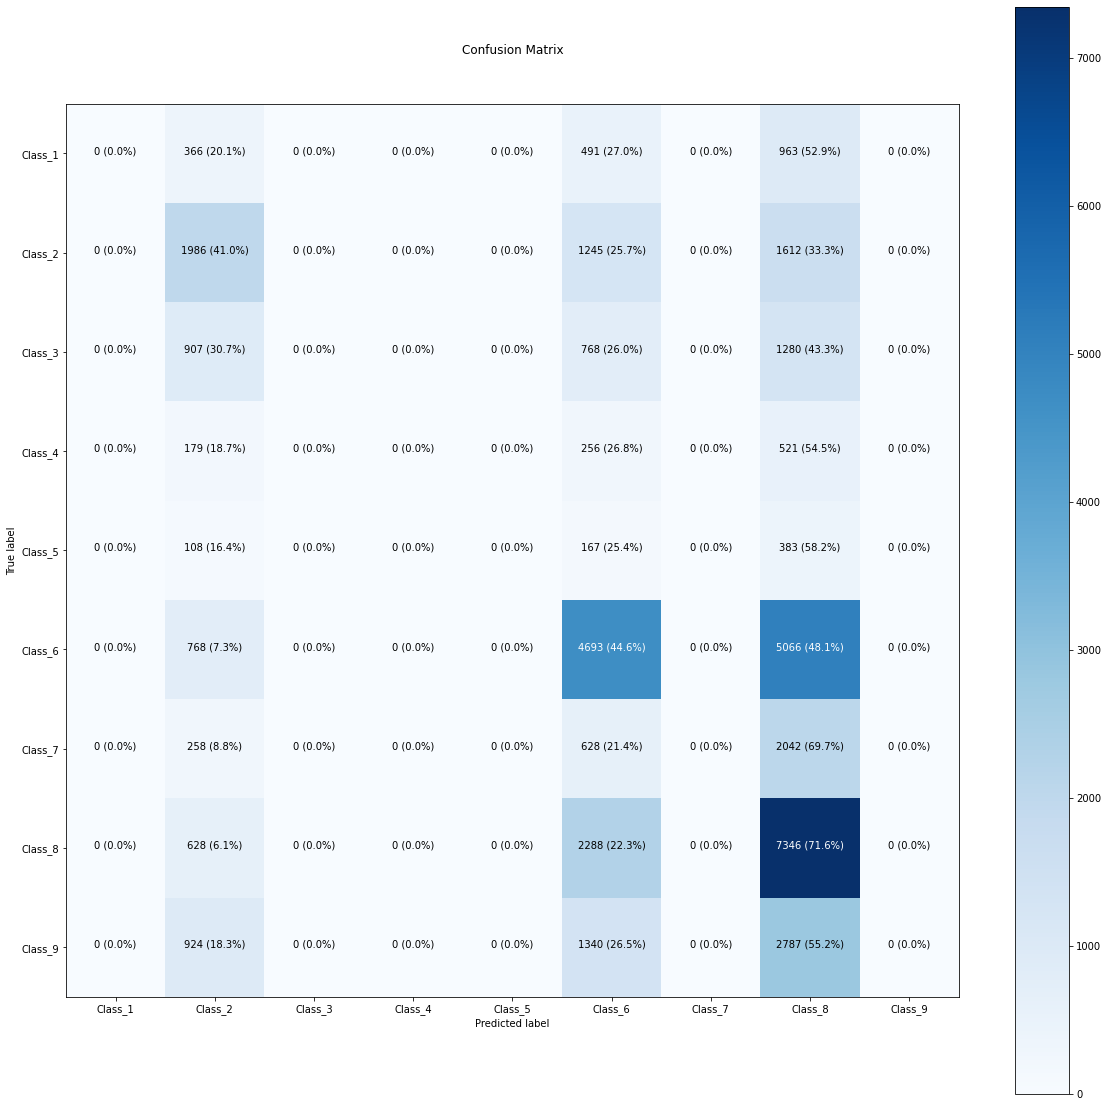

In [63]:
make_confusion_matrix(val_labels, y_preds, classes=list_classes, figsize=(20,20), text_size=10)

In [64]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

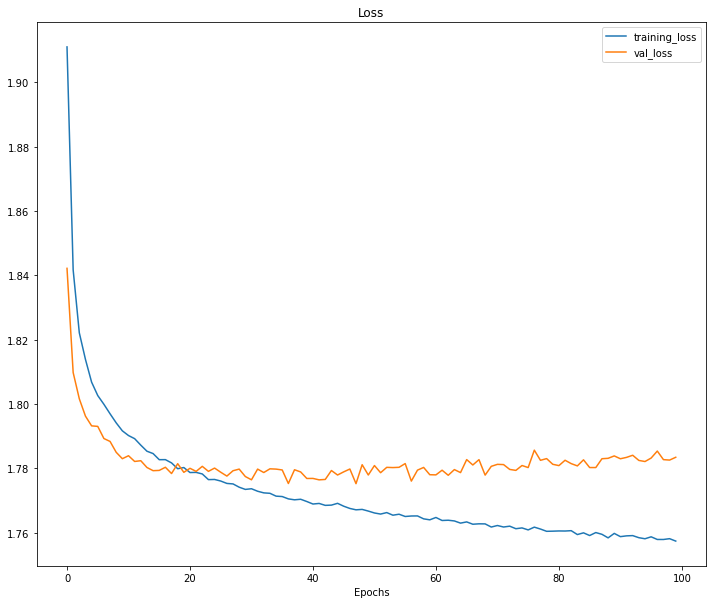

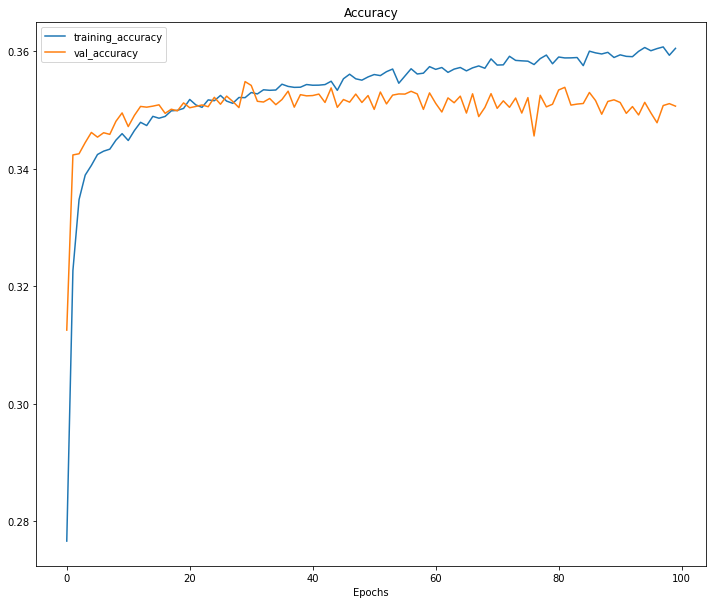

In [65]:
# Check out the loss curves of model_4
plot_loss_curves(norm_history_1)

# Make submission Csv

In [66]:
test_preds = model_1.predict(test_features)
test_preds

array([[0.05160101, 0.2552844 , 0.13410333, ..., 0.04071128, 0.10456601,
        0.15273325],
       [0.04322156, 0.07823657, 0.05889205, ..., 0.07895181, 0.2739537 ,
        0.13380708],
       [0.03414347, 0.06153557, 0.04384198, ..., 0.05795648, 0.21709284,
        0.10130741],
       ...,
       [0.05212291, 0.24302828, 0.13352498, ..., 0.05118798, 0.13407618,
        0.15842734],
       [0.03766555, 0.03368657, 0.02964507, ..., 0.08650191, 0.36774457,
        0.10283435],
       [0.04335279, 0.09839867, 0.06929234, ..., 0.06789085, 0.22648254,
        0.13860123]], dtype=float32)

In [67]:
ss.shape, test_preds.shape

((100000, 10), (100000, 9))

In [68]:
ss.iloc[:,1:10] = test_preds
ss.head()

,id,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9
0,200000,0.051601,0.255284,0.134103,0.030193,0.015210,0.215597,0.040711,0.104566,0.152733
1,200001,0.043222,0.078237,0.058892,0.024198,0.015685,0.293055,0.078952,0.273954,0.133807
2,200002,0.034143,0.061536,0.043842,0.017951,0.012020,0.454151,0.057956,0.217093,0.101307
3,200003,0.042468,0.038508,0.033376,0.018339,0.013769,0.267545,0.095161,0.379019,0.111815
4,200004,0.043722,0.087166,0.063548,0.024243,0.015213,0.304929,0.073691,0.250784,0.136705


In [69]:
from google.colab import files
import pandas as pd
ss.to_csv('sample_submission_1.csv')
files.download('sample_submission_1.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>